In [1]:
import imola
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [2]:
data = imola.load_yaml("example_config.yml")

l = imola.Lane(data)
em = imola.EgoMotion(data)
mn = imola.MeasurementNoise(data)
c = imola.Camera(data)

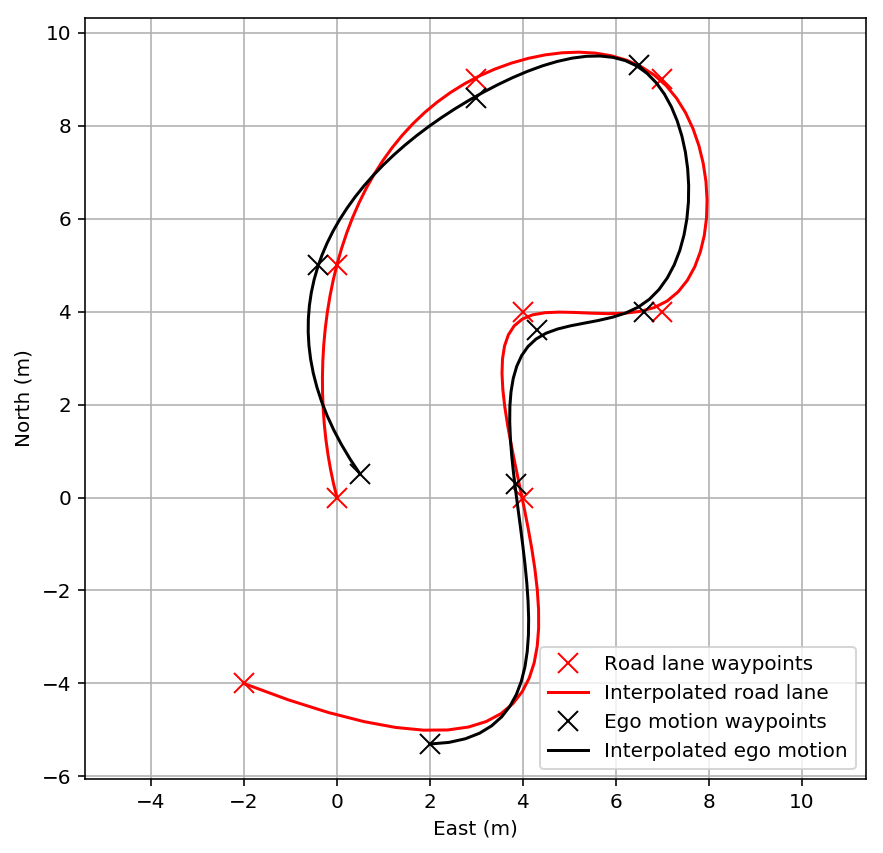

In [3]:
plt.figure(figsize=(7, 7))
plt.plot(l.xy_coarse[0, :], l.xy_coarse[1, :], "x", ms=10, c="r")
plt.plot(l.xy[0, :], l.xy[1, :], c="r")
plt.plot(em.xy_coarse[0, :], em.xy_coarse[1, :], "x", ms=10, c="k")
plt.plot(em.xy[0, :], em.xy[1, :], c="k")
plt.axis("equal")
plt.legend((
    "Road lane waypoints",
    "Interpolated road lane",
    "Ego motion waypoints",
    "Interpolated ego motion",
    ),
    loc="lower right",
    )
plt.grid()
plt.xlabel("East (m)")
plt.ylabel("North (m)")
plt.show()